In [1]:
!ffmpeg -hide_banner -loglevel panic -i "/content/gdrive/MyDrive/Huong-VanMaiHuongNegav-6927340.mp3" "huong.wav" -c wav

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
from IPython.display import Audio
from scipy.io import wavfile

samplerate, huong = wavfile.read('huong.wav')

start = samplerate * 43 
end = start + samplerate * 10 
Audio(data=huong[start:end, 0], rate=samplerate)

In [18]:
import numpy as np

huong_1 = huong[:,0]
block_size=1024
samples = len(huong_1)
hanging = block_size - np.mod(samples, block_size)
padded = np.lib.pad(huong_1, (0, hanging), 'constant', constant_values=0)

reshaped = padded.reshape((len(padded) // block_size, block_size))

In [19]:
print(reshaped)

[[  -7   -4    3 ... -642 -556 -470]
 [-381 -294 -207 ...  743  578  416]
 [ 252   90  -71 ... 5633 5676 5712]
 ...
 [  -1   -1    0 ...    2    2    0]
 [   1    1    0 ...    1    3    4]
 [   7    8    8 ...    0    0    0]]


Number of components explaining 95% variance: 71


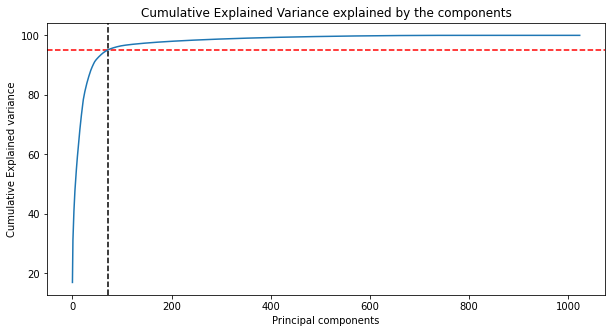

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(reshaped)

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [21]:
def pca_reduce(reshaped, n_components, block_size):
    pca = PCA(n_components=n_components)
    pca.fit(reshaped)
    
    transformed = pca.transform(reshaped)
    reconstructed = pca.inverse_transform(transformed).reshape((len(padded)))
    return reconstructed

In [22]:
k=71
reconstructed = pca_reduce(reshaped, k, 1024)

Audio(data=reconstructed[start:end], rate=samplerate)

In [26]:
reconstructed = pca_reduce(reshaped, 500, 1024)

Audio(data=reconstructed[start:end], rate=samplerate)